In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from random import randrange
import numpy as np




In [2]:
ex1 = pd.read_csv('./robogame-v0.5/server/example1/examplematch1.robotdata.csv')
time1 = ex1.iloc[:, 3:-11].T
time1['time'] = list(range(1, 101))

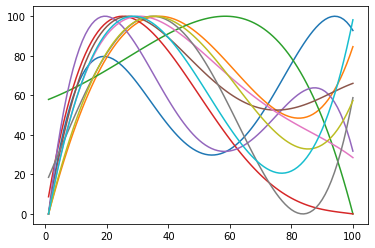

In [30]:
for i in range(10):
    plt.plot(time1.time, time1[i])

In [28]:
time1

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,time
t_1,0.000000,0.000000,57.920887,8.684055,0.000000,0.000000,0.000000,18.533860,0.000000,0.000000,...,40.536729,19.614153,0.000000,0.000000,0.000000,7.196892,0.000000,0.000000,0.000000,1
t_2,10.188414,5.710299,58.548901,17.376135,12.521851,9.133398,8.126207,22.207930,6.086799,7.917969,...,41.959094,25.248206,7.244617,6.393448,5.791284,13.914892,7.451433,8.728194,9.386137,2
t_3,19.509512,11.253289,59.196645,25.529184,24.000151,17.707861,15.807690,25.901089,11.972521,15.457105,...,43.551137,30.679815,14.129164,12.540859,11.385147,20.360498,14.528046,16.937219,18.171267,3
t_4,28.001504,16.627830,59.863918,33.159994,34.480122,25.741974,23.058024,29.601235,17.657304,22.623696,...,45.294909,35.907529,20.663429,18.445351,16.783348,26.534787,21.240129,24.644532,26.377119,4
t_5,35.701884,21.832917,60.550472,40.285120,44.006131,33.254047,29.890584,33.296659,23.141391,29.424070,...,47.172956,40.930085,26.857087,24.110078,21.987694,32.438986,27.597851,31.867319,34.025062,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t_96,99.328194,68.710424,22.016073,0.790160,50.589677,63.422318,32.791566,31.131136,45.029152,71.255035,...,30.862907,46.885372,68.065913,53.833034,69.002489,42.790454,66.455055,68.776033,67.709511,96
t_97,98.387499,72.178844,16.843956,0.594069,46.802780,64.130817,31.782439,37.080836,47.653392,77.358353,...,37.045565,52.754704,68.838465,55.706170,70.714064,48.635178,67.191565,68.798200,67.102555,97
t_98,97.004843,75.976281,11.453815,0.400798,42.426773,64.810158,30.731170,43.657946,50.574368,83.877040,...,43.911576,59.120683,69.665661,57.788538,72.615433,54.961209,67.980684,68.755435,66.348602,98
t_99,95.150250,80.114461,5.840798,0.204726,37.425137,65.452631,29.632461,50.887772,53.802533,90.821577,...,51.490199,65.999664,70.546326,60.086640,74.713041,61.783480,68.820997,68.639575,65.435123,99


In [34]:
robo0 = time1[[0, 'time']]

In [36]:
data0 = robo0.sample(10)
data0['time2'] = (data0.time)**2
data0['time3'] = (data0.time)**3

In [85]:
data0

,0,time,time2,time3,time4
t_16,78.164109,16,256,4096,65536
t_4,28.001504,4,16,64,256
t_20,79.512895,20,400,8000,160000
t_91,98.401057,91,8281,753571,68574961
t_79,73.266600,79,6241,493039,38950081
t_56,30.067021,56,3136,175616,9834496
t_9,59.312011,9,81,729,6561
t_74,59.793929,74,5476,405224,29986576
t_57,30.466116,57,3249,185193,10556001
t_67,43.275742,67,4489,300763,20151121


# Lasso Polynomial

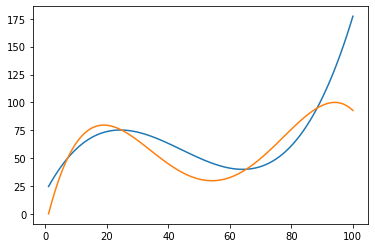

In [77]:
time_matrix = pd.DataFrame({'time':list(range(1, 101))})
time_matrix['time2'] = time_matrix.time**2
time_matrix['time3'] = time_matrix.time**3

lasso = linear_model.Lasso(alpha=0.1, max_iter=10000).fit(data0[['time', 'time2', 'time3']], data0[0])
lasso_pred = lasso.predict(time_matrix)
ret = pd.DataFrame({'time':time_matrix.time, 
                    'pred':pd.Series(lasso_pred), 
                    'actual':pd.Series(time1[0].values)})

plt.plot(ret.time, ret.pred)
plt.plot(ret.time, ret.actual)

# SVR rbf

In [151]:
svr = SVR(C=1000, epsilon=1).fit(data0[['time']], data0[0])

In [152]:
svr_pred = svr.predict(time_matrix[['time']])

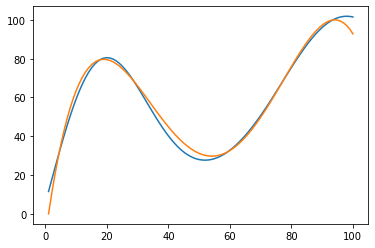

In [153]:
plt.plot(time_matrix['time'], svr_pred)
plt.plot(time_matrix['time'], time1[0].values)

# Example 1

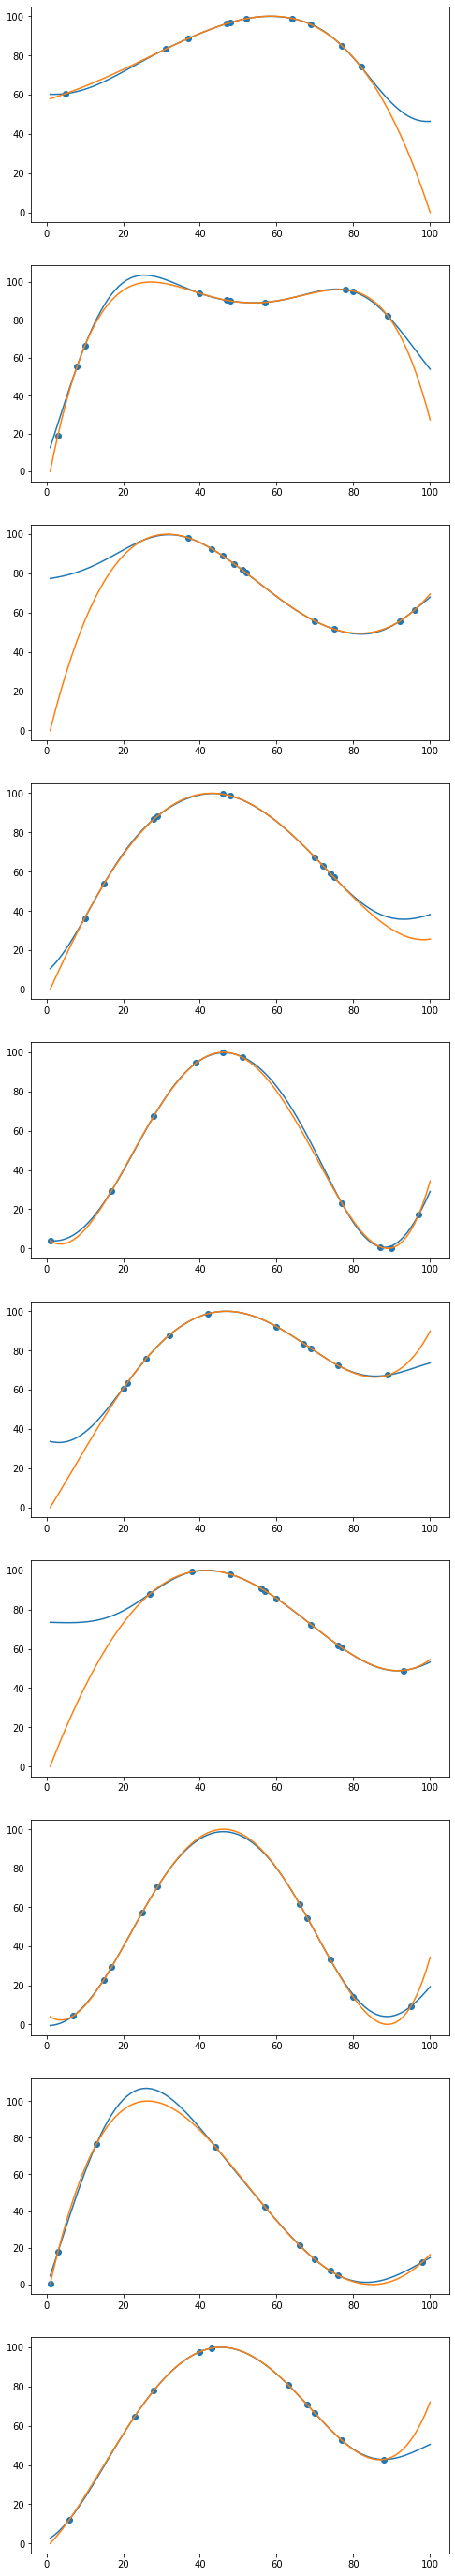

In [189]:
fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for i in range(10):
    sample = randrange(100)
    robo = time1[[sample, 'time']]
    data = robo.sample(10)
    svr = SVR(C=800, epsilon=0.01).fit(data[['time']], data[sample])
    svr_pred = svr.predict(time_matrix[['time']])

    axes[i].plot(time_matrix['time'], np.stack((svr_pred, robo[sample].values), axis=1))
    axes[i].scatter(data.time, data[sample])

# Example 2

In [178]:
ex2 = pd.read_csv('./robogame-v0.5/server/example2/examplematch2.robotdata.csv')
time2 = ex2.iloc[:, 3:-11].T
time2['time'] = list(range(1, 101))

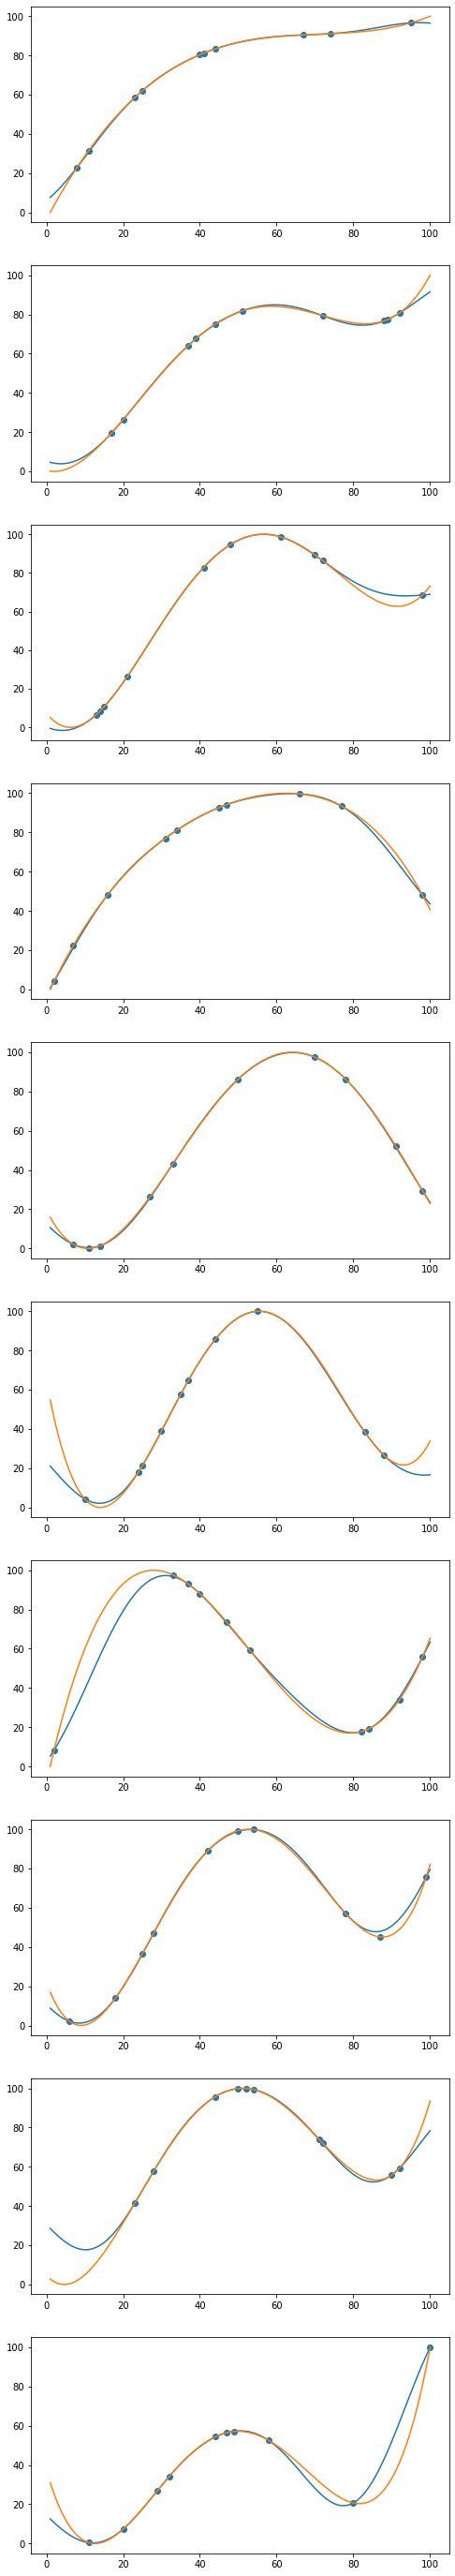

In [188]:
fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for i in range(10):
    sample = randrange(100)
    robo = time2[[sample, 'time']]
    data = robo.sample(10)
    svr = SVR(C=800, epsilon=0.01).fit(data[['time']], data[sample])
    svr_pred = svr.predict(time_matrix[['time']])

    axes[i].plot(time_matrix['time'], np.stack((svr_pred, robo[sample].values), axis=1))
    axes[i].scatter(data.time, data[sample])

# Example 3

In [180]:
ex3 = pd.read_csv('./robogame-v0.5/server/example3/examplematch3.robotdata.csv')
time3 = ex3.iloc[:, 3:-11].T
time3['time'] = list(range(1, 101))

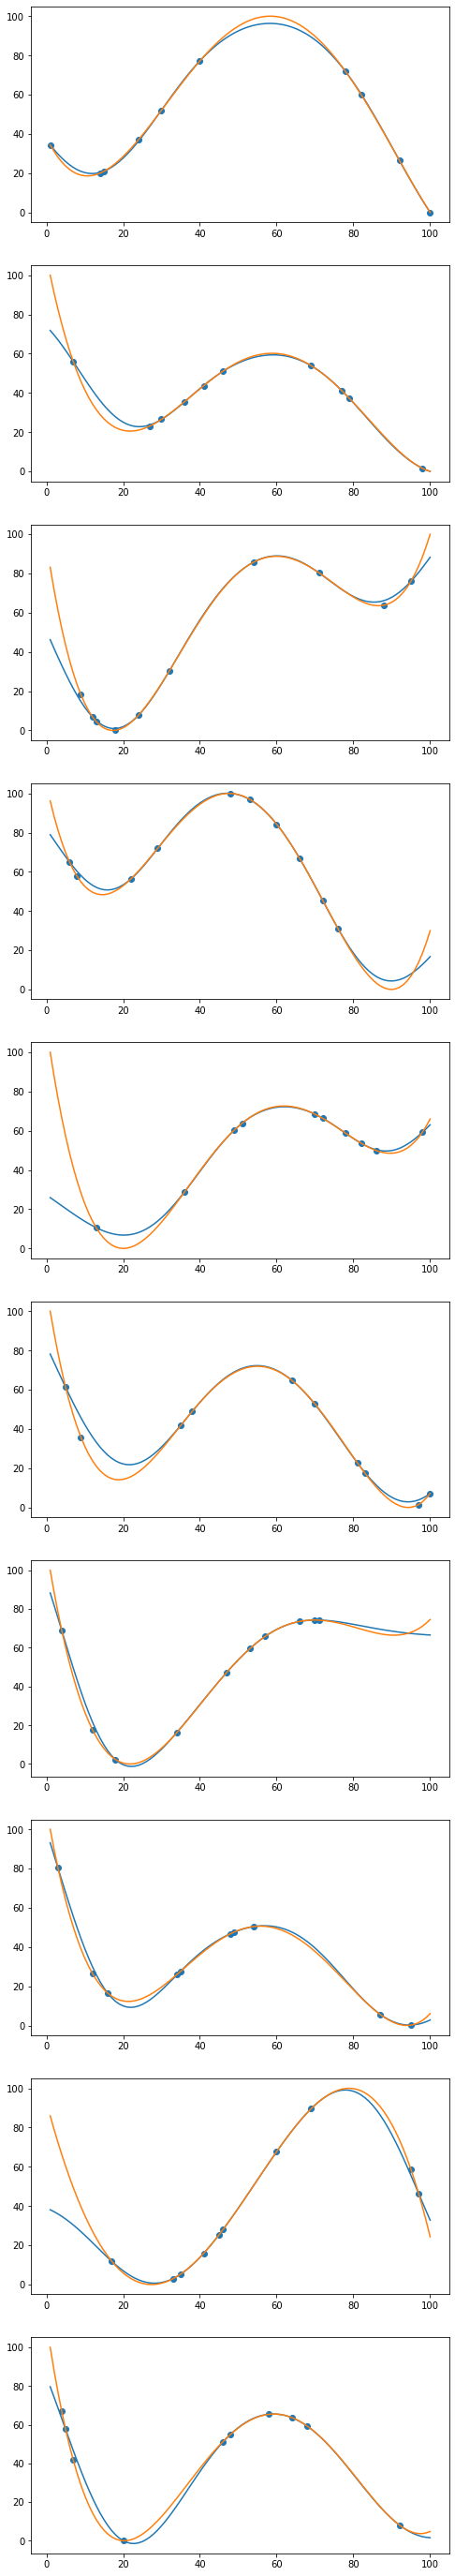

In [187]:
fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for i in range(10):
    sample = randrange(100)
    robo = time3[[sample, 'time']]
    data = robo.sample(10)
    svr = SVR(C=800, epsilon=0.05).fit(data[['time']], data[sample])
    svr_pred = svr.predict(time_matrix[['time']])

    axes[i].plot(time_matrix['time'], np.stack((svr_pred, robo[sample].values), axis=1))
    axes[i].scatter(data.time, data[sample])